**ABSTRACT**:-
             In  the finance  world stock  trading is one of  the most important activities. Stock market prediction is an act of trying to determine the future value of a stock other financial instrument  traded  on  a  financial  exchange.  This  paper explains the prediction of a stock using Machine Learning. The technical and fundamental or the time series analysis is used by  the  most  of  the  stockbrokers  while  making  the  stock predictions. The programming language is used to predict the stock market using machine learning is Python. In this paper we propose a Machine Learning (ML) approach that will be trained from the available stocks data and gain intelligence and  then  uses  the  acquired  knowledge  for  an  accurate prediction. In this context this study uses a machine learning technique  called Support  Vector  Machine  (SVM)  to  predict stock prices for the large and small capitalizations and in the three different markets, employing prices with both daily and up-to-the-minute frequencies.  
             

 **Key Words**: Stock  Market, Machine Learning,  Predictions, Support Vector Machine

In [ ]:
#install the dependencies

import numpy as np #library used for multidimensional arrays
import pandas as pd #used for data manipulation and analysis
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#load the data

from google.colab import files
uploaded = files.upload()

Saving Stock_Price_Predictor.ipynb to Stock_Price_Predictor (1).ipynb


In [ ]:
#store the data into a data frame

df = pd.read_csv('/content/NSE-TATAGLOBAL11.csv')
df.head(6)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35


In [ ]:
#Get the number of trading days

df.shape

(1235, 8)

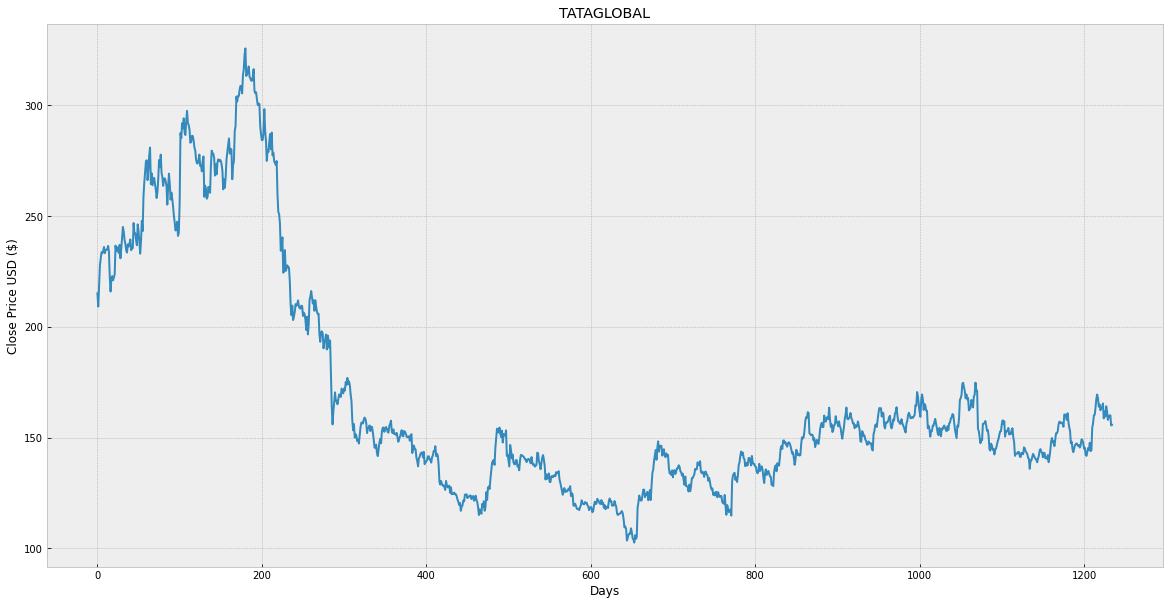

In [ ]:
#visualize the close price data
plt.figure(figsize=(20,10))
plt.title('TATAGLOBAL')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [ ]:
#Get the close price
df = df[['Close']]
df.head(6)

,Close
0,215.15
1,209.20
2,218.20
3,227.60
4,230.90
5,233.75


In [ ]:
#create a variable to predict 'x' days out into the future
future_days = 25
#create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(6)

,Close,Prediction
1229,158.05,NaN
1230,159.45,NaN
1231,160.05,NaN
1232,160.15,NaN
1233,155.55,NaN
1234,155.80,NaN


In [ ]:
#create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days

X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[215.15]
 [209.2 ]
 [218.2 ]
 ...
 [147.7 ]
 [143.95]
 [144.3 ]]


In [ ]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[234.55 233.35 237.05 ... 160.15 155.55 155.8 ]


In [ ]:
#split the data into 75% training and 25% testing

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [ ]:
#create the models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#get the last 'x' rows of the feature data set

x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[148.2 ],
       [144.75],
       [143.45],
       [145.15],
       [146.75],
       [147.  ],
       [147.45],
       [146.7 ],
       [146.2 ],
       [146.65],
       [145.55],
       [146.8 ],
       [149.3 ],
       [148.9 ],
       [147.65],
       [145.05],
       [145.5 ],
       [142.4 ],
       [141.8 ],
       [143.65],
       [145.35],
       [144.55],
       [147.7 ],
       [143.95],
       [144.3 ]])

In [ ]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[151.375      152.73333333 144.05       153.8        142.85
 167.6        163.525      142.85       148.36666667 161.975
 157.175      156.95       163.85       165.45       158.75
 155.85       159.6        150.925      147.41666667 158.05
 139.9        150.45       160.15       140.375      155.8       ]

[148.08716164 144.89484475 143.69194273 145.26496845 146.74546324
 146.97679055 147.39317971 146.69919777 146.23654315 146.65293231
 145.63509214 146.7917287  149.10500181 148.73487811 147.57824156
 145.17243752 145.58882668 142.72036802 142.16518248 143.87700458
 145.45003029 144.7097829  147.62450702 144.15459735 144.47845559]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


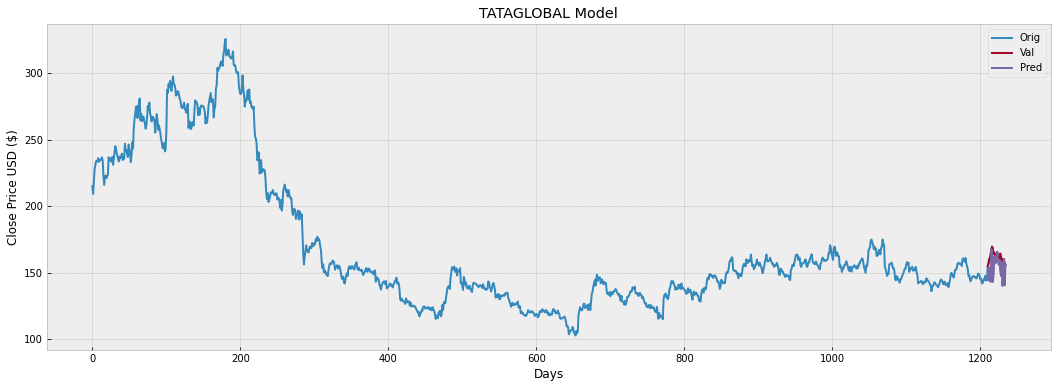

In [ ]:
#Visualize the data
Predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = Predictions
plt.figure(figsize=(18,6))
plt.title('TATAGLOBAL Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


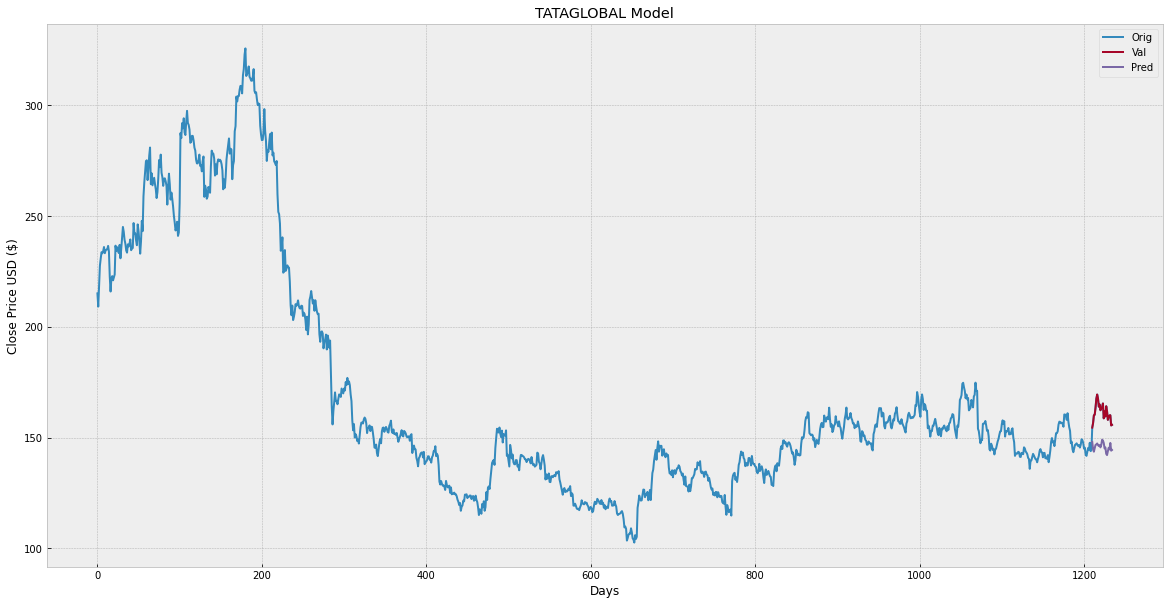

In [ ]:
#Visualize the data
Predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = Predictions
plt.figure(figsize=(20,10))
plt.title('TATAGLOBAL Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()